In [1]:
import csv, os, math
import numpy as np
import Helpers, src

In [2]:
covidFile = open("owid-covid-data.csv")
covidReader = csv.reader(covidFile)
myList = list(covidReader)
myList = Helpers.removeEmptyLists(myList)  # Remove empty rows from csv file
#print(myList[0][1])  # continent column
#print(myList[0][3])  # date column
#print(myList[0][4])  # total cases column
#print(myList[0][7])  # total deaths column
#print(myList[0][36]) # total fully vaccinated column

In [3]:
continents = ['Asia', 'Africa', 'North America', 'South America', 'Europe', 'Oceania']

months_list = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
               '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
               '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
               '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']  # Date format for Tableau

months_labels = ['Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '',
                 'Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '']  # xtick labels for matplotlib

month_index_map = {'01' : 0, '02' : 1, '03' : 2, '04' : 3, '05' : 4, '06' : 5, 
                   '07' : 6, '08' : 7, '09' : 8, '10' : 9, '11' : 10, '12' : 11 } 


covidDictionary = {

    "casesByMonth" : {"Asia" :          {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },   
                      
                      "Africa" :        {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "North America" : {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "South America" : {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "Europe" :        {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                                
                      "Oceania" :       {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] } }, 
    
    "deathsByMonth" : {"Asia" :         {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },   
                      
                      "Africa" :        {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "North America" : {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "South America" : {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "Europe" :        {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                                
                      "Oceania" :       {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] } }, 

    "vaccByMonth" : { "Asia" :          {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },   
                      
                      "Africa" :        {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "North America" : {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "South America" : {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                      
                      "Europe" :        {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] },
                                
                      "Oceania" :       {'2020' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         '2021' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] } } }

In [4]:
temp_loc, temp_cases, temp_deaths, temp_vacc, temp_month, temp_cont, temp_year = ['', ''], ['', ''], ['', ''], ['', ''], ['', ''], ['',''], ['','']

for i, row in enumerate(myList):
    
        if i == 0: continue  # Skip the header
               
        # Temporary lists check when the month or location has changed.   
        temp_loc[0]   = temp_loc[1]
        temp_loc[1]   = myList[i][2]

        temp_cont[0] = temp_cont[1]
        temp_cont[1] = myList[i][1]

        temp_month[0] = temp_month[1]
        temp_month[1] = myList[i][3][5:7]

        temp_year[0] = temp_year[1]
        temp_year[1] = myList[i][3][:4]

        temp_cases[0] = temp_cases[1]
        temp_cases[1] = myList[i][4]

        temp_deaths[0] = temp_deaths[1]
        temp_deaths[1] = myList[i][7]

        temp_vacc[0] = temp_vacc[1]
        temp_vacc[1] = myList[i][36]
        
        if temp_month[0] in month_index_map.keys():
            month_index = month_index_map[temp_month[0]]
        
        for key in covidDictionary.keys():

            if temp_cont[0] == '': continue  # Skip instances where data is not recorded.

            if key == "casesByMonth":
                if temp_cases[0] == '': continue 
                if temp_loc[0] == temp_loc[1] and temp_month[0] != temp_month[1]:
                    src.total_calculator(covidDictionary, key, temp_cases[0], temp_cont[0], month_index, temp_year[0])

            elif key == "deathsByMonth":
                if temp_deaths[0] == '': continue  
                if temp_loc[0] == temp_loc[1] and temp_month[0] != temp_month[1]:
                    src.total_calculator(covidDictionary, key, temp_deaths[0], temp_cont[0], month_index, temp_year[0])

            elif key == "vaccByMonth":
                if temp_vacc[0] == '': continue  
                if temp_loc[0] == temp_loc[1] and temp_month[0] != temp_month[1]:
                    src.total_calculator(covidDictionary, key, temp_vacc[0], temp_cont[0], month_index, temp_year[0])


# Convert dictionary key-value pairs to ordered lists (easier for matplotlib) 
casesByMonthList, deathsByMonthList, vaccByMonthList = [], [], []

for cont in covidDictionary['casesByMonth']:
    casesByMonthList.append(list(covidDictionary['casesByMonth'][cont].values()))
    deathsByMonthList.append(list(covidDictionary['deathsByMonth'][cont].values()))
    vaccByMonthList.append(list(covidDictionary['vaccByMonth'][cont].values()))
   
total_cases, total_deaths, total_vaccinated = [], [], []

for cont_index, cont in enumerate(continents):
    
    # Continent order: Asia, Africa, NA, SA, Europe, Oceania
    total_cases.append([])
    total_deaths.append([])
    total_vaccinated.append([])
    
    for i in range(2):  # 2020, 2021
        for j in range(12):  # Jan to Dec
            
            #Month/Year order: Jan 2020, Feb 2020, ... Nov 2021, Dec 2021
            total_cases[cont_index].append(casesByMonthList[cont_index][i][j])
            total_deaths[cont_index].append(deathsByMonthList[cont_index][i][j])
            total_vaccinated[cont_index].append(vaccByMonthList[cont_index][i][j])
            
            
casesDeathRatio = Helpers.listDivision(total_cases, total_deaths)

C:\Users\Matth\git\DataAnalysisWorkbooks\Covid19\Helpers.py:20: RuntimeWarning: divide by zero encountered in true_divide
  new_list = np.ndarray.tolist((np.array(list1) / np.array(list2)))
C:\Users\Matth\git\DataAnalysisWorkbooks\Covid19\Helpers.py:20: RuntimeWarning: invalid value encountered in true_divide
  new_list = np.ndarray.tolist((np.array(list1) / np.array(list2)))


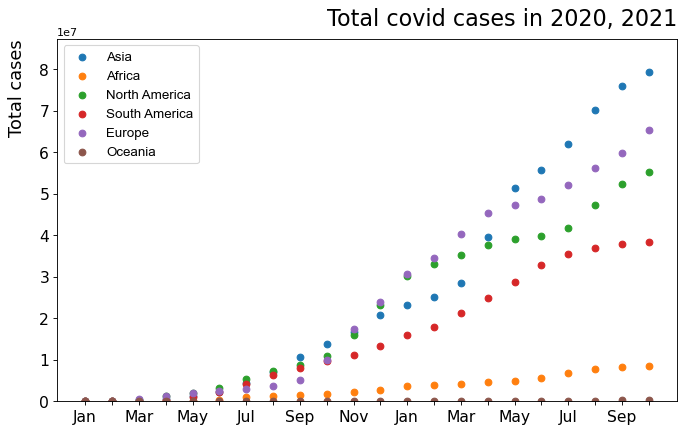

In [5]:
labels = ['', 'Total cases', 'Total covid cases in 2020, 2021', continents]
x, y = [], []

for i in range(6):  # Six continents
    x.append(months_list[ : 22])
    y.append(total_cases[i][ : 22])

yrange = [0, max(max(y)) * 1.1]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, legendLoc = 2,
                                  xTick = [True, months_list[:22], months_labels[:22]])

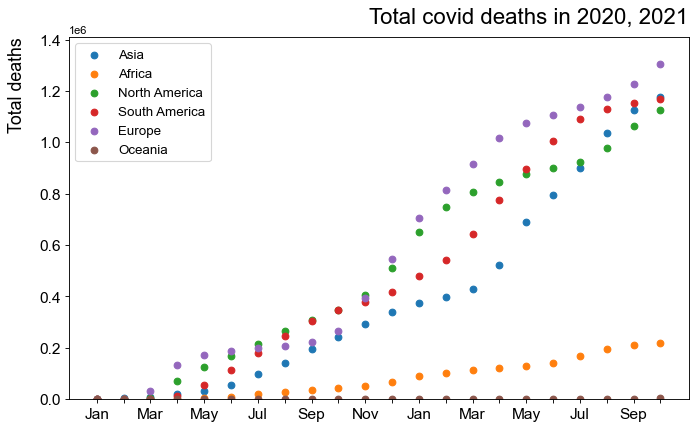

In [6]:
labels = ['', 'Total deaths', 'Total covid deaths in 2020, 2021', continents]
x, y = [], []

for i in range(6):
    x.append(months_list[ : 22])
    y.append(total_deaths[i][ : 22])
    
yrange = [0, max(max(y)) * 1.2]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, legendLoc = 2,
                                  xTick = [True, months_list[ : 22], months_labels[ : 22]])

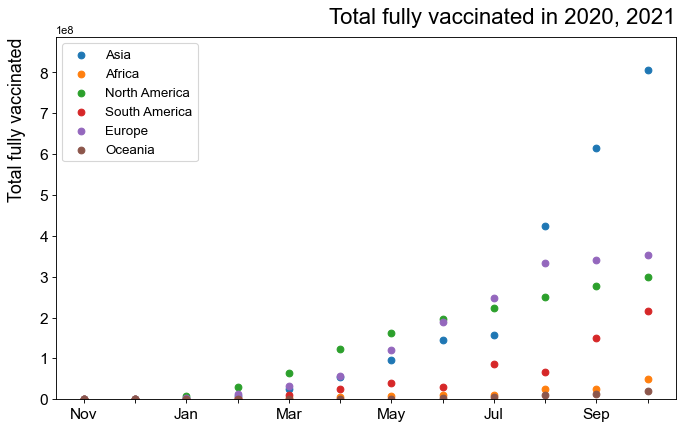

In [7]:
labels = ['', 'Total fully vaccinated', 'Total fully vaccinated in 2020, 2021', continents]
x, y = [], []

for i in range(6):
    x.append(months_list[10 : 22])
    y.append(total_vaccinated[i][10 : 22])
    
yrange = [0, max(y[0]) * 1.1]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, legendLoc = 2,
                                  xTick = [True, months_list[10 : 22], months_labels[10 : 22]])

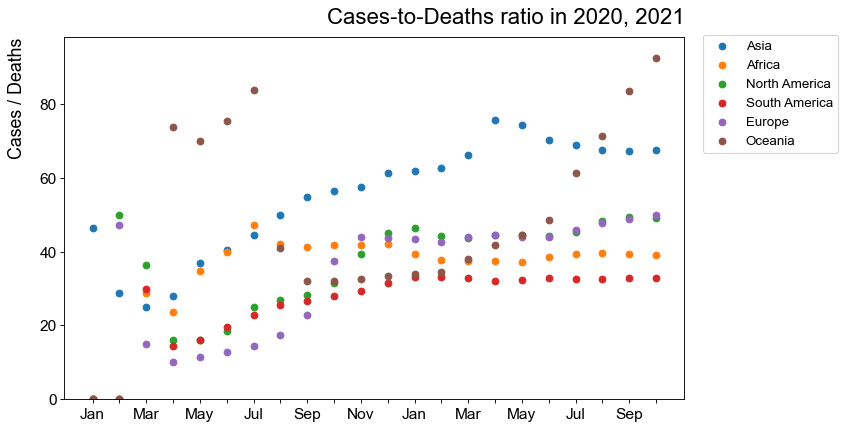

In [8]:
labels = ['', 'Cases / Deaths', 'Cases-to-Deaths ratio in 2020, 2021', continents]
x, y = [], []

for i in range(6):
    x.append(months_list[ : 22])
    y.append(casesDeathRatio[i][ : 22])
    
yrange = [0, max(y[0]) * 1.3]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, legendLoc = (1.03,0.68), 
                                  xTick = [True, months_list[ : 22], months_labels[ : 22]])

In [9]:
# Write data to Tableau-friendly csv format
outputFile = open("covid_data.csv", "w")
outputWriter = csv.writer(outputFile, lineterminator="\n")
outputWriter.writerow([ "Date", "Continent", "Total cases", "Total deaths", "Total fully vaccinated" ])  # Column headers

for cont in continents:
    for date in months_list:

        year = date[ : 4]
        month = int(date[ 5 : ])
        month_index = int(date[ 5 : ]) - 1
                
        if year == '2021' and month > 10: break  # Data for Nov 2021 and Dec 2021 are incomplete, so skip these.
        
        outputWriter.writerow([ date, cont, 
                                covidDictionary['casesByMonth'][cont][year][month_index], 
                                covidDictionary['deathsByMonth'][cont][year][month_index],
                                covidDictionary['vaccByMonth'][cont][year][month_index] 
                              ])  # writerow only takes list

outputFile.close()